In [32]:
# Python version 3.12.5

# library imports
import pandas as pd
import numpy as np
import math

#data vizs imports
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
# import data
data_og = pd.read_csv("transformed_dataset.csv")
data_og.head(10)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,ER,sqfeet/p,price/p,laundry_score,parking_score
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,ca,3,359.333333,382.666667,5,4
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,ca,2,500.500000,600.000000,4,4
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,ca,2,841.500000,906.500000,5,6
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,ca,1,708.000000,1095.000000,5,4
4,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking,ca,1,661.000000,935.000000,2,3
5,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,ca,1,708.000000,1095.000000,5,4
6,reno / tahoe,1525,apartment,1053,2,2.0,1,1,0,0,0,0,w/d in unit,carport,ca,2,526.500000,762.500000,5,4
7,reno / tahoe,1295,condo,930,2,2.0,0,0,0,0,0,0,w/d in unit,carport,ca,2,465.000000,647.500000,5,4
8,reno / tahoe,2195,house,3115,4,3.0,0,0,0,0,0,0,w/d hookups,attached garage,ca,4,778.750000,548.750000,4,6
9,reno / tahoe,1159,apartment,1181,3,2.0,1,1,1,0,0,0,w/d in unit,carport,ca,3,393.666667,386.333333,5,4


In [34]:
data_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24175 entries, 0 to 24174
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   24175 non-null  object 
 1   price                    24175 non-null  int64  
 2   type                     24175 non-null  object 
 3   sqfeet                   24175 non-null  int64  
 4   beds                     24175 non-null  int64  
 5   baths                    24175 non-null  float64
 6   cats_allowed             24175 non-null  int64  
 7   dogs_allowed             24175 non-null  int64  
 8   smoking_allowed          24175 non-null  int64  
 9   wheelchair_access        24175 non-null  int64  
 10  electric_vehicle_charge  24175 non-null  int64  
 11  comes_furnished          24175 non-null  int64  
 12  laundry_options          24175 non-null  object 
 13  parking_options          24175 non-null  object 
 14  state                 

In [35]:
data_og.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,ER,sqfeet/p,price/p,laundry_score,parking_score
count,2.417500e+04,2.417500e+04,24175.000000,24175.000000,24175.000000,24175.000000,24175.000000,24175.000000,24175.000000,24175.000000,24175.000000,24175.000000,2.417500e+04,24175.000000,24175.000000
mean,2.361127e+03,1.085510e+03,1.850341,1.519131,0.740558,0.714498,0.631520,0.111479,0.053816,0.040869,1.889224,578.030117,1.310087e+03,3.790114,4.331706
std,6.653751e+04,9.319515e+03,0.900404,0.607086,0.438337,0.451662,0.482402,0.314731,0.225659,0.197990,0.839167,2133.233588,2.218980e+04,1.337840,1.052621
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,1.000000
25%,1.325000e+03,7.200000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,445.000000,6.975000e+02,2.000000,4.000000
50%,1.700000e+03,9.180000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,520.000000,1.010000e+03,4.000000,4.000000
75%,2.225000e+03,1.115000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,650.500000,1.485000e+03,5.000000,5.000000
max,1.032119e+07,1.019856e+06,7.000000,6.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,254964.000000,3.440396e+06,5.000000,7.000000


# Takeaways
- Max price is 10,321,190 per month. Too high for analysis purposes.
- The price column may have outliers which is skewing the data. Need to limit max to $5,000 per month
- The max beds and baths in the dataset are high (7/6) for our purposes. Limit beds to 4 and baths to 3

# Data Cleaning

In [36]:
# Limit max rent price to $5000.
data_og = data_og[data_og['price'] <= 5000]

# Limit max beds to 4 and baths to 3
data_og = data_og[data_og['beds'] <= 4]
data_og = data_og[data_og['baths'] <= 3]


data_og.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,ER,sqfeet/p,price/p,laundry_score,parking_score
count,23628.000000,23628.000000,23628.000000,23628.000000,23628.000000,23628.000000,23628.000000,23628.000000,23628.000000,23628.000000,23628.000000,23628.000000,23628.000000,23628.000000,23628.000000
mean,1821.873625,967.674793,1.806628,1.484595,0.746783,0.719401,0.636998,0.110674,0.052692,0.036990,1.846411,556.542548,1140.716216,3.773870,4.310056
std,753.377792,959.602849,0.841567,0.550835,0.434863,0.449302,0.480875,0.313734,0.223422,0.188741,0.776328,405.509124,616.165488,1.343126,1.037628
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,1309.000000,713.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,444.000000,697.500000,2.000000,4.000000
50%,1695.000000,902.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,519.000000,1002.500000,4.000000,4.000000
75%,2195.000000,1100.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,650.000000,1468.625000,5.000000,5.000000
max,5000.000000,95242.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,47621.000000,5000.000000,5.000000,7.000000


In [37]:
# drop non-numeric column
data = data_og.drop(['region','type','state', 'laundry_options','parking_options'], axis = 1)
data.head(10)

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,ER,sqfeet/p,price/p,laundry_score,parking_score
0,1148,1078,3,2.0,1,1,0,0,0,0,3,359.333333,382.666667,5,4
1,1200,1001,2,2.0,0,0,0,0,0,0,2,500.500000,600.000000,4,4
2,1813,1683,2,2.0,1,1,1,0,0,0,2,841.500000,906.500000,5,6
3,1095,708,1,1.0,1,1,1,0,0,0,1,708.000000,1095.000000,5,4
4,935,661,1,1.0,1,1,1,0,0,0,1,661.000000,935.000000,2,3
5,1095,708,1,1.0,1,1,1,0,0,0,1,708.000000,1095.000000,5,4
6,1525,1053,2,2.0,1,1,0,0,0,0,2,526.500000,762.500000,5,4
7,1295,930,2,2.0,0,0,0,0,0,0,2,465.000000,647.500000,5,4
8,2195,3115,4,3.0,0,0,0,0,0,0,4,778.750000,548.750000,4,6
9,1159,1181,3,2.0,1,1,1,0,0,0,3,393.666667,386.333333,5,4


# Exploratory Data Analysis

Key Assumptions: 
- Looking for an affordable apartment (3 bd / 2 ba) 
- In Southern California area
- That is furnished, allow pets, and parking is available
- monthly rental budget $4000

# 1. How do pet policies, parking availability, and furnishing status affect rental pricing?

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23628 entries, 0 to 24174
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    23628 non-null  int64  
 1   sqfeet                   23628 non-null  int64  
 2   beds                     23628 non-null  int64  
 3   baths                    23628 non-null  float64
 4   cats_allowed             23628 non-null  int64  
 5   dogs_allowed             23628 non-null  int64  
 6   smoking_allowed          23628 non-null  int64  
 7   wheelchair_access        23628 non-null  int64  
 8   electric_vehicle_charge  23628 non-null  int64  
 9   comes_furnished          23628 non-null  int64  
 10  ER                       23628 non-null  int64  
 11  sqfeet/p                 23628 non-null  float64
 12  price/p                  23628 non-null  float64
 13  laundry_score            23628 non-null  int64  
 14  parking_score            23

## A. Pet policy price analysis

In [39]:
# convert beds column to string for analysis purposes
pets_data = data_og.drop(['wheelchair_access','electric_vehicle_charge', 'smoking_allowed', 'laundry_options','type','parking_options'], axis = 1)
pets_data['beds'] = pets_data['beds'].astype(str)

# Create pets_allowed column: 1 if cats_allowed or dogs_allowed is 1, else 0
pets_data['pets_allowed'] = ((pets_data['cats_allowed'] == 1) | (pets_data['dogs_allowed'] == 1)).astype(int)

# filter for only rows with pets_allowed and furnished

#pets_data = pets_data[pets_data['pets_allowed'] == 1]
#pets_data = pets_data[pets_data['comes_furnished'] == 1]


pets_data.head(10)

,region,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,comes_furnished,state,ER,sqfeet/p,price/p,laundry_score,parking_score,pets_allowed
0,reno / tahoe,1148,1078,3,2.0,1,1,0,ca,3,359.333333,382.666667,5,4,1
1,reno / tahoe,1200,1001,2,2.0,0,0,0,ca,2,500.500000,600.000000,4,4,0
2,reno / tahoe,1813,1683,2,2.0,1,1,0,ca,2,841.500000,906.500000,5,6,1
3,reno / tahoe,1095,708,1,1.0,1,1,0,ca,1,708.000000,1095.000000,5,4,1
4,reno / tahoe,935,661,1,1.0,1,1,0,ca,1,661.000000,935.000000,2,3,1
5,reno / tahoe,1095,708,1,1.0,1,1,0,ca,1,708.000000,1095.000000,5,4,1
6,reno / tahoe,1525,1053,2,2.0,1,1,0,ca,2,526.500000,762.500000,5,4,1
7,reno / tahoe,1295,930,2,2.0,0,0,0,ca,2,465.000000,647.500000,5,4,0
8,reno / tahoe,2195,3115,4,3.0,0,0,0,ca,4,778.750000,548.750000,4,6,0
9,reno / tahoe,1159,1181,3,2.0,1,1,0,ca,3,393.666667,386.333333,5,4,1


In [40]:
# average/median per parking options
pets_group = (
    pets_data
      .groupby(['pets_allowed','beds'])
      .mean(numeric_only=True)  
      .round(2)
      .reset_index()
)

pets_group

,pets_allowed,beds,price,sqfeet,baths,cats_allowed,dogs_allowed,comes_furnished,ER,sqfeet/p,price/p,laundry_score,parking_score
0,0,0,1179.12,443.98,1.00,0.00,0.00,0.16,1.0,443.98,1179.12,2.24,3.21
1,0,1,1375.39,657.35,1.01,0.00,0.00,0.11,1.0,657.35,1375.39,2.90,3.72
2,0,2,1641.09,978.84,1.47,0.00,0.00,0.04,2.0,489.42,820.55,3.41,4.21
3,0,3,1982.67,1449.83,2.03,0.00,0.00,0.05,3.0,483.28,660.89,3.89,4.98
4,0,4,2259.10,1976.63,2.35,0.00,0.00,0.04,4.0,494.16,564.78,3.98,5.59
5,1,0,1728.21,512.17,1.01,0.99,0.92,0.03,1.0,512.17,1728.21,3.06,3.88
6,1,1,1726.97,704.34,1.00,0.99,0.93,0.03,1.0,704.34,1726.97,3.66,4.15
7,1,2,1912.89,1002.86,1.68,0.99,0.95,0.02,2.0,501.43,956.45,3.98,4.27
8,1,3,2072.26,1371.21,2.01,0.95,0.97,0.04,3.0,457.07,690.75,4.46,4.90
9,1,4,2507.97,1957.51,2.41,0.86,0.95,0.10,4.0,489.38,626.99,4.24,5.58


In [41]:
no_pets_group = pets_group[pets_group['pets_allowed'] == 0]
no_pets_group

,pets_allowed,beds,price,sqfeet,baths,cats_allowed,dogs_allowed,comes_furnished,ER,sqfeet/p,price/p,laundry_score,parking_score
0,0,0,1179.12,443.98,1.00,0.0,0.0,0.16,1.0,443.98,1179.12,2.24,3.21
1,0,1,1375.39,657.35,1.01,0.0,0.0,0.11,1.0,657.35,1375.39,2.90,3.72
2,0,2,1641.09,978.84,1.47,0.0,0.0,0.04,2.0,489.42,820.55,3.41,4.21
3,0,3,1982.67,1449.83,2.03,0.0,0.0,0.05,3.0,483.28,660.89,3.89,4.98
4,0,4,2259.10,1976.63,2.35,0.0,0.0,0.04,4.0,494.16,564.78,3.98,5.59


In [42]:
yes_pets_group = pets_group[pets_group['pets_allowed'] == 1]
yes_pets_group

,pets_allowed,beds,price,sqfeet,baths,cats_allowed,dogs_allowed,comes_furnished,ER,sqfeet/p,price/p,laundry_score,parking_score
5,1,0,1728.21,512.17,1.01,0.99,0.92,0.03,1.0,512.17,1728.21,3.06,3.88
6,1,1,1726.97,704.34,1.00,0.99,0.93,0.03,1.0,704.34,1726.97,3.66,4.15
7,1,2,1912.89,1002.86,1.68,0.99,0.95,0.02,2.0,501.43,956.45,3.98,4.27
8,1,3,2072.26,1371.21,2.01,0.95,0.97,0.04,3.0,457.07,690.75,4.46,4.90
9,1,4,2507.97,1957.51,2.41,0.86,0.95,0.10,4.0,489.38,626.99,4.24,5.58


In [43]:
# Differnce (Yes - No)
diff = yes_pets_group.set_index('beds') - no_pets_group.set_index('beds')
diff

,pets_allowed,price,sqfeet,baths,cats_allowed,dogs_allowed,comes_furnished,ER,sqfeet/p,price/p,laundry_score,parking_score
beds,,,,,,,,,,,,
0,1,549.09,68.19,0.01,0.99,0.92,-0.13,0.0,68.19,549.09,0.82,0.67
1,1,351.58,46.99,-0.01,0.99,0.93,-0.08,0.0,46.99,351.58,0.76,0.43
2,1,271.80,24.02,0.21,0.99,0.95,-0.02,0.0,12.01,135.90,0.57,0.06
3,1,89.59,-78.62,-0.02,0.95,0.97,-0.01,0.0,-26.21,29.86,0.57,-0.08
4,1,248.87,-19.12,0.06,0.86,0.95,0.06,0.0,-4.78,62.21,0.26,-0.01


/var/folders/49/mhn1mqtj6x5fg36szsq9bkxw0000gq/T/ipykernel_31560/525908179.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='beds', y='price', data=diff_reset, palette='coolwarm')


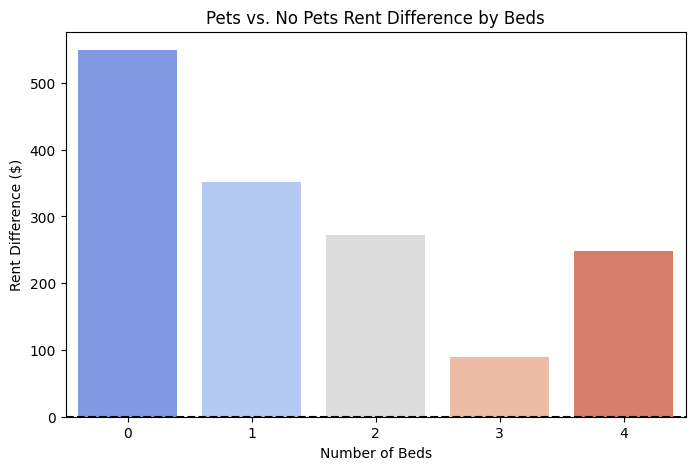

In [44]:
# Bar Plot

# Reset index so 'beds' is a column
diff_reset = diff.reset_index()

# Bar plot for rent_mean difference
plt.figure(figsize=(8,5))
sns.barplot(x='beds', y='price', data=diff_reset, palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title('Pets vs. No Pets Rent Difference by Beds')
plt.ylabel('Rent Difference ($)')
plt.xlabel('Number of Beds')
plt.show()

## Takeaway:
- units that allow pets on average cost more money than units that do not allow cats.
- The price difference is small for 3 bedrooms, which is great news based on my requirements

## B. Parking option price analysis

In [45]:
parking_data = data_og.drop(['region','type','state', 'laundry_options','cats_allowed','dogs_allowed','wheelchair_access','electric_vehicle_charge','comes_furnished','smoking_allowed'], axis = 1)
parking_data['beds'] = parking_data['beds'].astype(str)

parking_data.head(10)

,price,sqfeet,beds,baths,parking_options,ER,sqfeet/p,price/p,laundry_score,parking_score
0,1148,1078,3,2.0,carport,3,359.333333,382.666667,5,4
1,1200,1001,2,2.0,carport,2,500.500000,600.000000,4,4
2,1813,1683,2,2.0,attached garage,2,841.500000,906.500000,5,6
3,1095,708,1,1.0,carport,1,708.000000,1095.000000,5,4
4,935,661,1,1.0,off-street parking,1,661.000000,935.000000,2,3
5,1095,708,1,1.0,carport,1,708.000000,1095.000000,5,4
6,1525,1053,2,2.0,carport,2,526.500000,762.500000,5,4
7,1295,930,2,2.0,carport,2,465.000000,647.500000,5,4
8,2195,3115,4,3.0,attached garage,4,778.750000,548.750000,4,6
9,1159,1181,3,2.0,carport,3,393.666667,386.333333,5,4


In [46]:
# average/median per parking options
parking_group = (
    parking_data
      .groupby('parking_options')
      .mean(numeric_only=True) 
      .round(2)
      .reset_index()
)

parking_group.head()

,parking_options,price,sqfeet,baths,ER,sqfeet/p,price/p,laundry_score,parking_score
0,attached garage,2263.12,1314.96,1.85,2.39,577.62,1150.14,4.43,6.0
1,carport,1601.96,871.64,1.38,1.70,550.79,1069.79,3.61,4.0
2,detached garage,2182.02,1026.95,1.61,1.91,577.10,1332.57,4.36,5.0
3,no parking,1805.31,619.76,1.08,1.36,462.29,1401.62,2.83,1.0
4,off-street parking,1785.62,853.79,1.32,1.66,543.26,1205.79,3.17,3.0


/var/folders/49/mhn1mqtj6x5fg36szsq9bkxw0000gq/T/ipykernel_31560/104954858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parking_options', y='price', data=parking_group, palette='viridis')


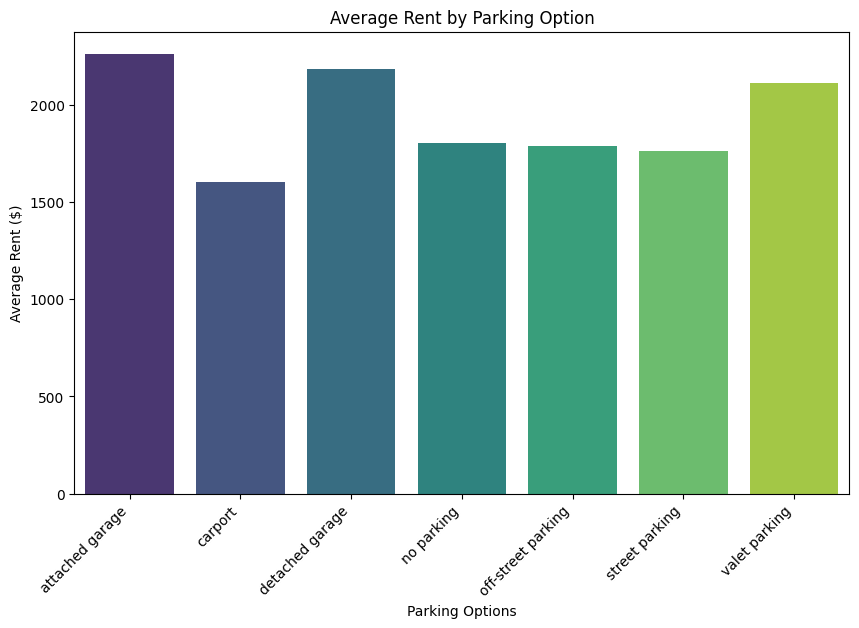

In [47]:
# Bar Plot - Average Rent by Parking Option

plt.figure(figsize=(10,6))
sns.barplot(x='parking_options', y='price', data=parking_group, palette='viridis')

plt.xticks(rotation=45, ha='right') 
plt.title('Average Rent by Parking Option')
plt.ylabel('Average Rent ($)')
plt.xlabel('Parking Options')
plt.show()

### Takeaway:
- units that offer parking have a higher average rent price than units that do not offer parking. 

## C. Furnished unit price analysis

In [48]:
furnished_data = data_og.drop(['region','type','state', 'laundry_options','cats_allowed','dogs_allowed','wheelchair_access','electric_vehicle_charge','parking_options','smoking_allowed'], axis = 1)

furnished_data['beds'] = furnished_data['beds'].astype(str)

furnished_data.head(25)

,price,sqfeet,beds,baths,comes_furnished,ER,sqfeet/p,price/p,laundry_score,parking_score
0,1148,1078,3,2.0,0,3,359.333333,382.666667,5,4
1,1200,1001,2,2.0,0,2,500.500000,600.000000,4,4
2,1813,1683,2,2.0,0,2,841.500000,906.500000,5,6
3,1095,708,1,1.0,0,1,708.000000,1095.000000,5,4
4,935,661,1,1.0,0,1,661.000000,935.000000,2,3
5,1095,708,1,1.0,0,1,708.000000,1095.000000,5,4
6,1525,1053,2,2.0,0,2,526.500000,762.500000,5,4
7,1295,930,2,2.0,0,2,465.000000,647.500000,5,4
8,2195,3115,4,3.0,0,4,778.750000,548.750000,4,6
9,1159,1181,3,2.0,0,3,393.666667,386.333333,5,4


In [49]:
# average/median per parking options
furnished_group = (
    furnished_data
      .groupby('comes_furnished')
      .mean(numeric_only=True) 
      .round(2)
      .reset_index()
)

furnished_group.head()

,comes_furnished,price,sqfeet,baths,ER,sqfeet/p,price/p,laundry_score,parking_score
0,0,1810.09,962.46,1.48,1.85,554.86,1132.15,3.77,4.31
1,1,2128.70,1103.46,1.49,1.83,600.27,1363.70,3.88,4.18


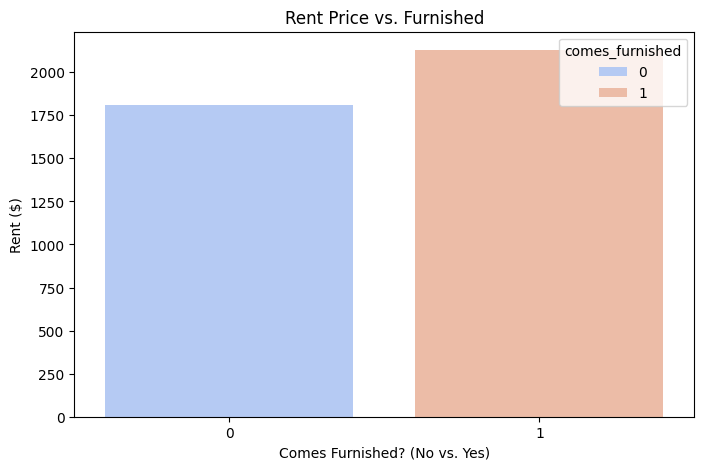

In [50]:
# Bar Plot - Rent Price vs. Furnished

# Bar plot for rent_mean difference
plt.figure(figsize=(8,5))
sns.barplot(x='comes_furnished', y='price', data=furnished_group, hue='comes_furnished', palette='coolwarm')
plt.title('Rent Price vs. Furnished')
plt.ylabel('Rent ($)')
plt.xlabel('Comes Furnished? (No vs. Yes)')
plt.show()

### Takeaway:
- furnished units are more money, but not significantly more.

# 2. What area should I move to? Are there any regions (areas) that are out of my budget?

## A. reigonal price analysis

In [51]:
data_og.head(10)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,ER,sqfeet/p,price/p,laundry_score,parking_score
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,ca,3,359.333333,382.666667,5,4
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,ca,2,500.500000,600.000000,4,4
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,ca,2,841.500000,906.500000,5,6
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,ca,1,708.000000,1095.000000,5,4
4,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking,ca,1,661.000000,935.000000,2,3
5,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,ca,1,708.000000,1095.000000,5,4
6,reno / tahoe,1525,apartment,1053,2,2.0,1,1,0,0,0,0,w/d in unit,carport,ca,2,526.500000,762.500000,5,4
7,reno / tahoe,1295,condo,930,2,2.0,0,0,0,0,0,0,w/d in unit,carport,ca,2,465.000000,647.500000,5,4
8,reno / tahoe,2195,house,3115,4,3.0,0,0,0,0,0,0,w/d hookups,attached garage,ca,4,778.750000,548.750000,4,6
9,reno / tahoe,1159,apartment,1181,3,2.0,1,1,1,0,0,0,w/d in unit,carport,ca,3,393.666667,386.333333,5,4


In [52]:
region_data = data_og.drop(['type','state', 'laundry_options','cats_allowed','dogs_allowed','wheelchair_access','electric_vehicle_charge','comes_furnished','smoking_allowed'], axis = 1)
region_data['beds'] = region_data['beds'].astype(str)

region_data.head(10)

,region,price,sqfeet,beds,baths,parking_options,ER,sqfeet/p,price/p,laundry_score,parking_score
0,reno / tahoe,1148,1078,3,2.0,carport,3,359.333333,382.666667,5,4
1,reno / tahoe,1200,1001,2,2.0,carport,2,500.500000,600.000000,4,4
2,reno / tahoe,1813,1683,2,2.0,attached garage,2,841.500000,906.500000,5,6
3,reno / tahoe,1095,708,1,1.0,carport,1,708.000000,1095.000000,5,4
4,reno / tahoe,935,661,1,1.0,off-street parking,1,661.000000,935.000000,2,3
5,reno / tahoe,1095,708,1,1.0,carport,1,708.000000,1095.000000,5,4
6,reno / tahoe,1525,1053,2,2.0,carport,2,526.500000,762.500000,5,4
7,reno / tahoe,1295,930,2,2.0,carport,2,465.000000,647.500000,5,4
8,reno / tahoe,2195,3115,4,3.0,attached garage,4,778.750000,548.750000,4,6
9,reno / tahoe,1159,1181,3,2.0,carport,3,393.666667,386.333333,5,4


In [53]:
# Filter for listings with 1 bathroom
filtered_data = region_data[region_data['baths'] == 1]

# Group by region and number of beds, then calculate average price
avg_price_per_region_beds = (
    filtered_data.groupby(['region', 'beds', 'baths'])['price']
    .mean()
    .reset_index()
    .rename(columns={'price': 'avg_price'})
    .round(2)
)

# Display the result
avg_price_per_region_beds.head(10)


,region,beds,baths,avg_price
0,SF bay area,0,1.0,2292.45
1,SF bay area,1,1.0,2507.29
2,SF bay area,2,1.0,2652.56
3,SF bay area,3,1.0,2740.45
4,SF bay area,4,1.0,5000.00
5,bakersfield,0,1.0,762.86
6,bakersfield,1,1.0,954.40
7,bakersfield,2,1.0,958.36
8,bakersfield,3,1.0,1088.70
9,bakersfield,4,1.0,995.00


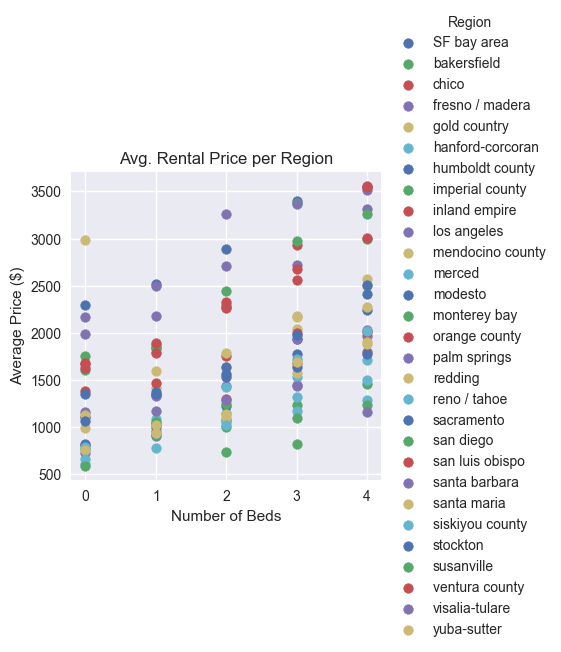

In [70]:
# Group data
avg_price = (
    region_data.groupby(['region', 'beds'])['price']
    .mean()
    .reset_index()
    .rename(columns={'price': 'avg_price'})
)

# Plot
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(4, 4))
for region in avg_price['region'].unique():
    subset = avg_price[avg_price['region'] == region]
    ax.scatter(subset['beds'], subset['avg_price'], label=region)

ax.set_xlabel('Number of Beds')
ax.set_ylabel('Average Price ($)')
ax.set_title('Avg. Rental Price per Region')
ax.legend(title='Region', loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True)
plt.show()


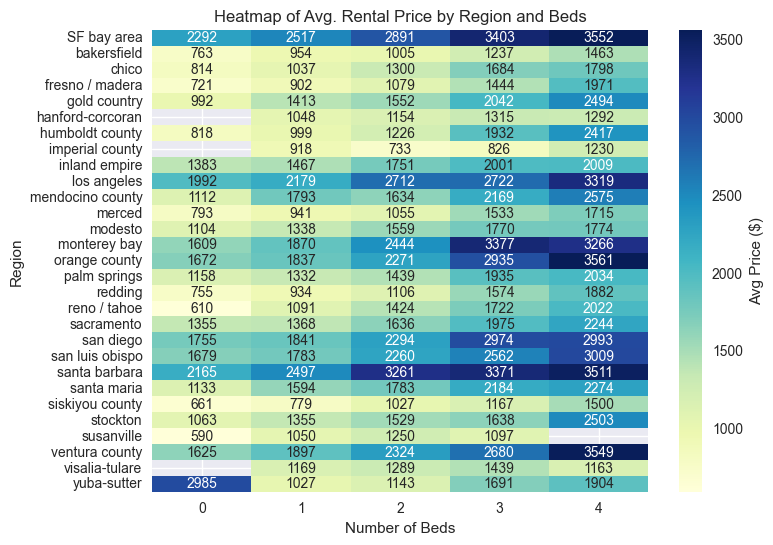

In [57]:
# Group data
avg_price = (
    region_data.groupby(['region', 'beds'])['price']
    .mean()
    .reset_index()
    .rename(columns={'price': 'avg_price'})
)

# Pivot for heatmap
heatmap_data = avg_price.pivot(index='region', columns='beds', values='avg_price')

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Avg Price ($)'})
plt.title('Heatmap of Avg. Rental Price by Region and Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Region')
plt.show()



### Takeaway
- viewing the heatmap, the average 3 bedroom and 4 bedrooms in all regions of California are within the monthly rental budget of $4000 per month.
- This is significant because I can afford to move to almost any area in Southern California based on my budget.

In [ ]:
# 2b. what are the most expensive and most affordable areas?

## B. Top 10 most expensive regions

In [58]:
# Sort by average price descending and select top 10
top_10_regions = avg_price.sort_values(by='avg_price', ascending=False).head(10)

top_10_regions['avg_price'] = round(top_10_regions['avg_price'],2)

# Display the result
top_10_regions

,region,beds,avg_price
72,orange county,4,3560.59
4,SF bay area,4,3552.26
131,ventura county,4,3548.75
107,santa barbara,4,3510.77
3,SF bay area,3,3402.92
66,monterey bay,3,3376.54
106,santa barbara,3,3370.77
47,los angeles,4,3319.06
67,monterey bay,4,3265.88
105,santa barbara,2,3261.06


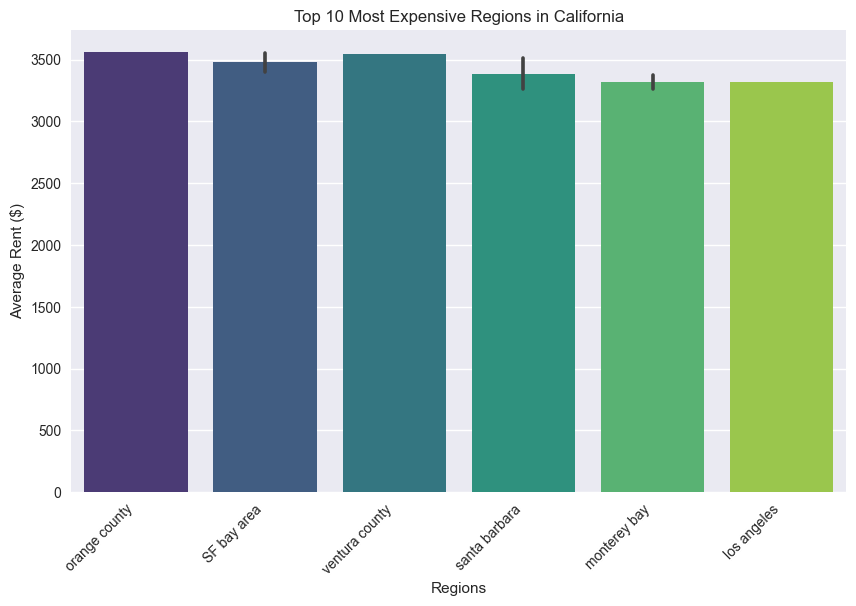

In [59]:
# Bar Plot - Top 10 Most Expensive Regions in California

plt.figure(figsize=(10,6))
sns.barplot(x='region', y='avg_price', data=top_10_regions, palette='viridis', hue='region')

plt.xticks(rotation=45, ha='right') 
plt.title('Top 10 Most Expensive Regions in California')
plt.ylabel('Average Rent ($)')
plt.xlabel('Regions')
plt.show()

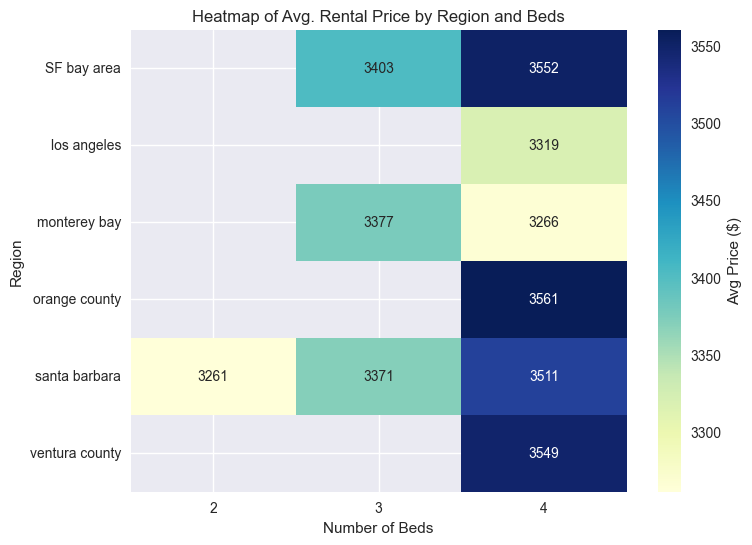

In [60]:
# Pivot the data for heatmap
heatmap_data = top_10_regions.pivot(index='region', columns='beds', values='avg_price')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Avg Price ($)'})
plt.title('Heatmap of Avg. Rental Price by Region and Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Region')
plt.show()

## C. Top 10 most affordable (bottom) regions

In [61]:
# Sort by average price descending and select top 10
bottom_10_regions = avg_price.sort_values(by='avg_price', ascending=False).tail(10)

bottom_10_regions['avg_price'] = round(bottom_10_regions['avg_price'],2)

# Display the result
bottom_10_regions

,region,beds,avg_price
10,chico,0,814.23
53,merced,0,793.33
114,siskiyou county,1,778.75
5,bakersfield,0,762.86
78,redding,0,755.00
35,imperial county,2,732.60
15,fresno / madera,0,721.20
113,siskiyou county,0,661.25
83,reno / tahoe,0,609.51
123,susanville,0,590.00


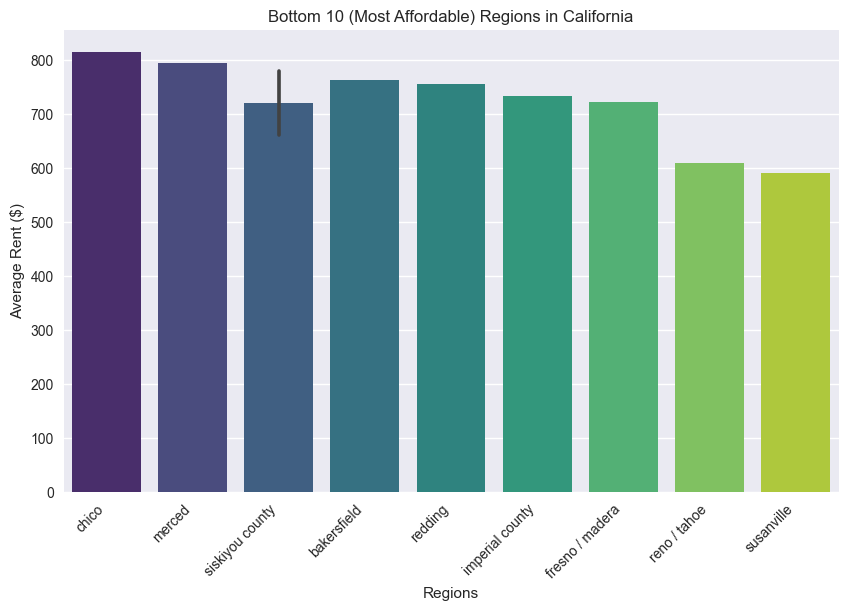

In [62]:
# Bar Plot - Bottom 10 Regions in California

plt.figure(figsize=(10,6))
sns.barplot(x='region', y='avg_price', data=bottom_10_regions, palette='viridis', hue='region')

plt.xticks(rotation=45, ha='right') 
plt.title('Bottom 10 (Most Affordable) Regions in California')
plt.ylabel('Average Rent ($)')
plt.xlabel('Regions')
plt.show()

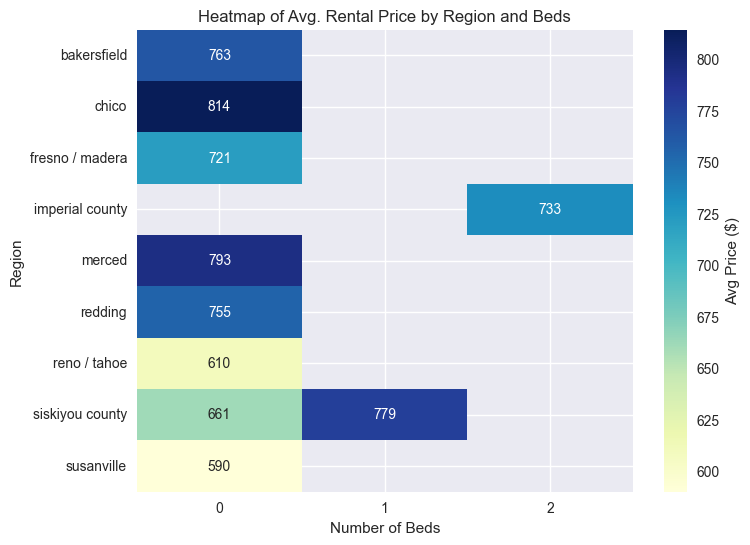

In [63]:
# Pivot the data for heatmap
heatmap_data = bottom_10_regions.pivot(index='region', columns='beds', values='avg_price')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Avg Price ($)'})
plt.title('Heatmap of Avg. Rental Price by Region and Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Region')
plt.show()

# 3. Which area should I move to? 

- I am looking for an affordable apartment (3 bd / 2 ba) in Los Angeles, California to move into that is furnished, allow pets, and parking is available.

In [64]:
# Sort by average price descending and select top 10
top_10_regions = avg_price.sort_values(by='avg_price', ascending=False).head(10)

top_10_regions['avg_price'] = round(top_10_regions['avg_price'],2)

# Display the result
top_10_regions

,region,beds,avg_price
72,orange county,4,3560.59
4,SF bay area,4,3552.26
131,ventura county,4,3548.75
107,santa barbara,4,3510.77
3,SF bay area,3,3402.92
66,monterey bay,3,3376.54
106,santa barbara,3,3370.77
47,los angeles,4,3319.06
67,monterey bay,4,3265.88
105,santa barbara,2,3261.06


In [65]:
# filter move data based on moving requirements


move_data = data_og.drop(['type','state', 'laundry_options','wheelchair_access','electric_vehicle_charge','smoking_allowed'], axis = 1)
move_data['beds'] = move_data['beds'].astype(str)

# Create pets_allowed column: 1 if cats_allowed or dogs_allowed is 1, else 0
move_data['pets_allowed'] = ((move_data['cats_allowed'] == 1) | (move_data['dogs_allowed'] == 1)).astype(int)

# filter for only rows with pets_allowed and furnished

move_data = move_data[move_data['pets_allowed'] == 1]
move_data = move_data[move_data['comes_furnished'] == 1]

move_data.head(10)

,region,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,comes_furnished,parking_options,ER,sqfeet/p,price/p,laundry_score,parking_score,pets_allowed
54,sacramento,2595,1317,2,2.5,1,1,1,attached garage,2,658.500000,1297.500000,5,6,1
69,reno / tahoe,1099,1100,2,1.5,1,1,1,carport,2,550.000000,549.500000,3,4,1
74,reno / tahoe,2300,2000,3,2.0,1,1,1,attached garage,3,666.666667,766.666667,5,6,1
76,reno / tahoe,2300,2000,3,2.0,1,1,1,attached garage,3,666.666667,766.666667,5,6,1
157,reno / tahoe,2057,1020,2,2.0,1,1,1,attached garage,2,510.000000,1028.500000,5,6,1
174,reno / tahoe,1595,860,2,1.0,1,1,1,carport,2,430.000000,797.500000,5,4,1
177,reno / tahoe,1199,860,2,1.0,1,1,1,carport,2,430.000000,599.500000,5,4,1
226,reno / tahoe,1595,860,2,1.0,1,1,1,carport,2,430.000000,797.500000,5,4,1
264,reno / tahoe,1595,860,2,1.0,1,1,1,carport,2,430.000000,797.500000,5,4,1
265,reno / tahoe,1595,860,2,1.0,1,1,1,carport,2,430.000000,797.500000,5,4,1


In [66]:
# Group and prepare data
move_avg_price = (
    move_data.groupby(['region', 'beds'])['price']
    .mean()
    .reset_index()
    .rename(columns={'price': 'avg_price'})
)

move_avg_price

,region,beds,avg_price
0,SF bay area,0,2070.333333
1,SF bay area,1,2604.162162
2,SF bay area,2,3034.222222
3,SF bay area,3,4850.000000
4,SF bay area,4,4106.285714
...,...,...,...
79,ventura county,1,2195.750000
80,ventura county,2,2899.333333
81,ventura county,3,2185.714286
82,visalia-tulare,3,1280.000000


In [67]:
# Most expensive areas - all within my budget

move_top_10_regions = move_avg_price.sort_values(by='avg_price', ascending=False).head(10)

move_top_10_regions

,region,beds,avg_price
3,SF bay area,3,4850.000000
4,SF bay area,4,4106.285714
40,monterey bay,3,3995.000000
72,santa barbara,3,3800.000000
28,los angeles,2,3750.000000
71,santa barbara,2,3652.894737
48,palm springs,4,3562.500000
44,orange county,3,3495.000000
27,los angeles,1,3301.571429
64,san diego,3,3089.285714


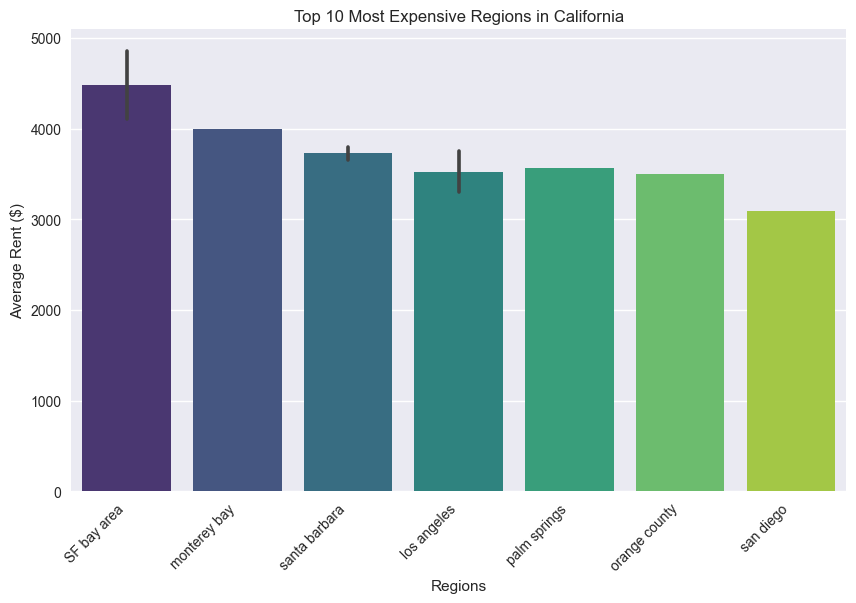

In [68]:
# Bar Plot - Top 10 Most Expensive Regions in California

plt.figure(figsize=(10,6))
sns.barplot(x='region', y='avg_price', data=move_top_10_regions, palette='viridis', hue='region')

plt.xticks(rotation=45, ha='right') 
plt.title('Top 10 Most Expensive Regions in California')
plt.ylabel('Average Rent ($)')
plt.xlabel('Regions')
plt.show()

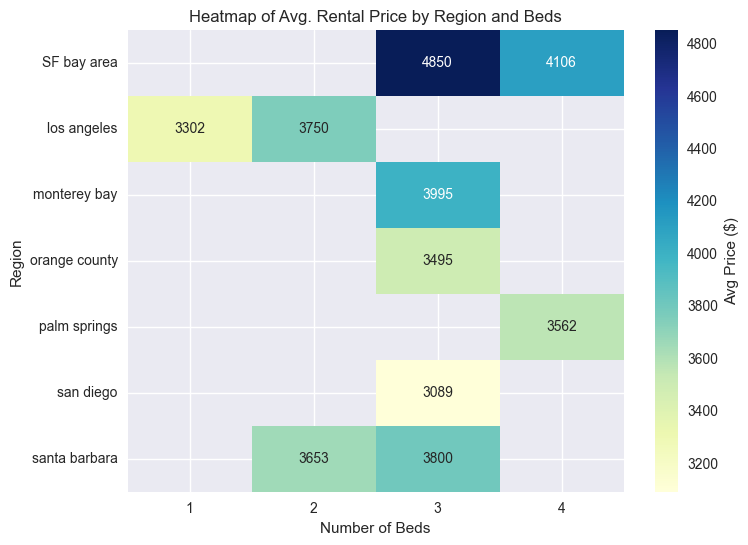

In [69]:
# Pivot the data for heatmap
move_heatmap_data = move_top_10_regions.pivot(index='region', columns='beds', values='avg_price')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(move_heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Avg Price ($)'})
plt.title('Heatmap of Avg. Rental Price by Region and Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Region')
plt.show()

## Takeaway
- Given my budget and requirements (pet and furnished), I can afford to move into a 2 or 3 bedroom apartment in LA. 
- Given the budget, these are the the list of regions in Calfironia I can afford to rent an apartment. These are the regions with higher rent prices but are more likely to allow pets and come furnished. 
- Next steps is to research neighborhoods in each region to look up things like population, employment rate, etc.. I will need to investigate neighborhoods in these regions to find an aparment. 